In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

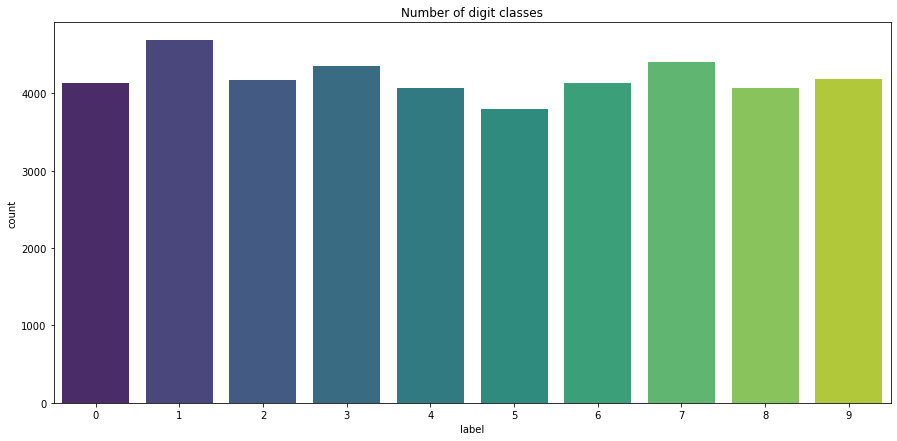

In [5]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train, palette="viridis")
plt.title("Number of digit classes")
Y_train.value_counts()

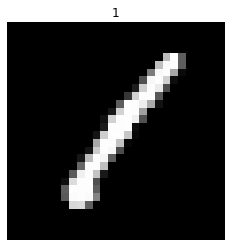

In [6]:
img = X_train.iloc[0].to_numpy() # Switched .as_matrix() due to being deprecated since v0.23.0
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [9]:
# sample 25 digits from train
indexes = np.random.randint(0, X_train.shape[0], size=25)
#indexes
images = X_train.loc[indexes]
labels = Y_train.loc[indexes]

KeyError: 0

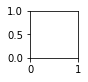

In [8]:
# plot 25 digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
#plt.savefig("mnist-samples.png")
#plt.close('all')

In [10]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [12]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# Converts answer to a vector computer can learn from 
Y_train = to_categorical(Y_train, num_classes = 10)

In [13]:
from sklearn.model_selection import train_test_split
# Splits data so we have an acc read (Just good practice)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [15]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Create the model base
cnnModel = Sequential()
# Add the layers
cnnModel.add(Conv2D(filters = 8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
cnnModel.add(MaxPool2D(pool_size=(2,2)))
cnnModel.add(Dropout(0.25))
cnnModel.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
cnnModel.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnnModel.add(Dropout(0.25))

cnnModel.add(Flatten())
cnnModel.add(Dense(256, activation='relu'))
cnnModel.add(Dropout(0.5))
cnnModel.add(Dense(10, activation='softmax'))

# Set the optimizer
cnnOptimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
cnnModel.compile(optimizer=cnnOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
cnnModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)              

In [16]:
epochs = 10  # More Epochs = Higher Acc (Better chance to overfit or no?)
batch_size = 250 # Helps determine iteration count and back-front sweeps

In [17]:
# Data augmentation to prevent overfitting
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
datagen.fit(X_train)

# Fit the model
cnnHistory = cnnModel.fit_generator(datagen.flow(X_train, Y_train, batch_size=250), epochs=10, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // 250)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
151/151 [==============================] - 18s 113ms/step - loss: 1.5877 - accuracy: 0.4532 - val_loss: 0.2483 - val_accuracy: 0.9305
Epoch 2/10
151/151 [==============================] - 17s 112ms/step - loss: 0.5311 - accuracy: 0.8323 - val_loss: 0.1351 - val_accuracy: 0.9617
Epoch 3/10
151/151 [==============================] - 17s 110ms/step - loss: 0.3485 - accuracy: 0.8907 - val_loss: 0.1084 - val_accuracy: 0.9710
Epoch 4/10
151/151 [==============================] - 17s 112ms/step - loss: 0.2857 - accuracy: 0.9101 - val_loss: 0.0925 - val_accuracy: 0.9743
Epoch 5/10
151/151 [==============================] - 17s 111ms/step - loss: 0.2414 - accuracy: 0.9243 - val_loss: 0.0837 - val_accuracy: 0.9774
Epoch 6/10
151/151 [==============================] - 17s 111ms/step - loss: 0.2243 - accuracy: 0.9313 - val_loss: 0.0726 - val_accuracy: 0.9810
Epoch 7/10
151/151 [==============================] - 17s 111ms/step - loss: 0.2080 - accuracy: 0.9367 - val_loss: 0.0647 - val_ac

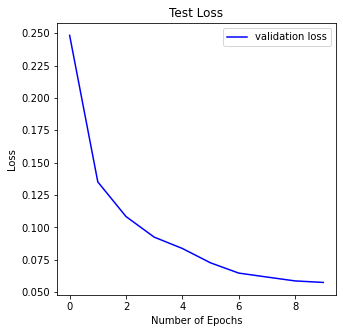

In [18]:
plt.figure(figsize=(5,5))
plt.plot(cnnHistory.history['val_loss'], color='b', label='validation loss')
plt.title('Test Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

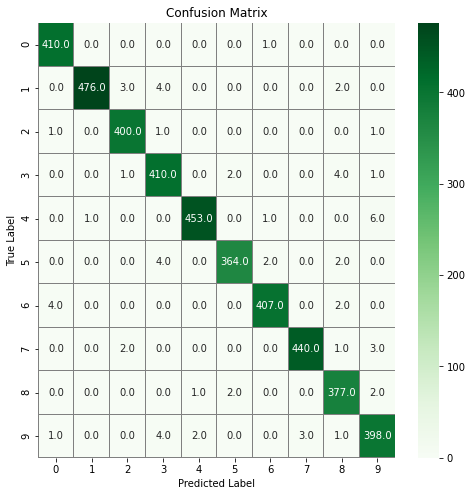

In [ ]:
# Predict the values from the validation dataset
pred_Y = cnnModel.predict(X_val)
# Convert predictions classes to one hot vectors 
pred_YClass = np.argmax(pred_Y,axis = 1) 
# Convert validation observations to one hot vectors
true_Y = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusionMatrix = confusion_matrix(true_Y, pred_YClass) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()